In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

1. Eczema 1677
2. Melanoma 15.75k
3. Atopic Dermatitis - 1.25k
4. Basal Cell Carcinoma (BCC) 3323
5. Melanocytic Nevi (NV) - 7970
6. Benign Keratosis-like Lesions (BKL) 2624
7. Psoriasis pictures Lichen Planus and related diseases - 2k
8. Seborrheic Keratoses and other Benign Tumors - 1.8k
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k
10. Warts Molluscum and other Viral Infections - 2103

In [3]:
train_dir = 'content/skin-data/train'
test_dir = 'content/skin-data/test'
val_dir = 'content/skin-data/val'

In [4]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)



In [5]:
from PIL import Image

image_path = 'content/skin-data/test/1/t-03DermatitisArm.jpg'
image = Image.open(image_path)
width, height = image.size

print(f"이미지 크기: {width}x{height}")

이미지 크기: 720x472


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # 이미지 크기 조정
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 17923 images belonging to 10 classes.
Found 3838 images belonging to 10 classes.
Found 3850 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,  Dropout

model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
])
# base_model.trainable = False


model = Sequential([
    model1,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 28, 28, 64)        56320     
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               6422656   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 6480266 (24.72 MB)
Trainable params: 6480266 (24.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 28, 28, 64)      

In [29]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/5
560/560 [==============================] - 629s 1s/step - loss: 1.7701 - accuracy: 0.4377 - val_loss: 1.3421 - val_accuracy: 0.5066
Epoch 2/5
560/560 [==============================] - 511s 913ms/step - loss: 1.3770 - accuracy: 0.4847 - val_loss: 1.3567 - val_accuracy: 0.4827
Epoch 3/5
560/560 [==============================] - 499s 890ms/step - loss: 1.3897 - accuracy: 0.4757 - val_loss: 1.3114 - val_accuracy: 0.4976
Epoch 4/5
560/560 [==============================] - 504s 899ms/step - loss: 1.2853 - accuracy: 0.5087 - val_loss: 1.3061 - val_accuracy: 0.4808
Epoch 5/5
560/560 [==============================] - 507s 906ms/step - loss: 1.3385 - accuracy: 0.4932 - val_loss: 1.3628 - val_accuracy: 0.4869


In [30]:
model.evaluate(test_generator)

121/121 [==============================] - 87s 724ms/step - loss: 1.3831 - accuracy: 0.4779


[1.3831201791763306, 0.47792208194732666]

In [16]:
history

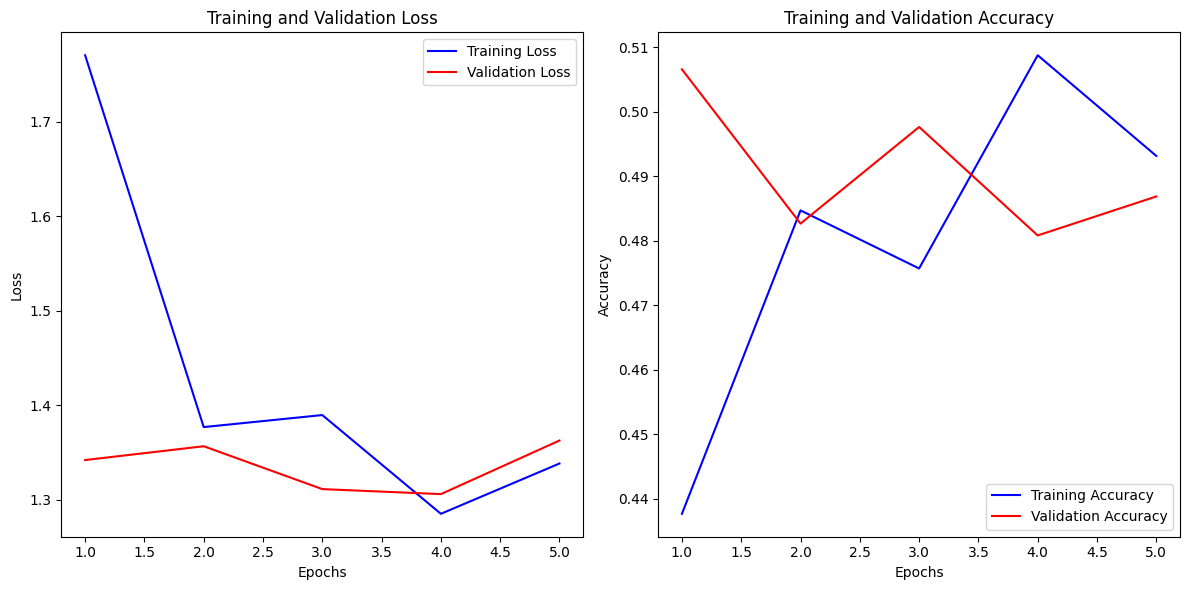

In [31]:
import matplotlib.pyplot as plt

# 학습 기록에서 손실과 정확도 데이터를 가져옴
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', None)
val_accuracy = history.history.get('val_accuracy', None)

epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프 (정확도가 있는 경우만)
if accuracy and val_accuracy:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()
